<a href="https://colab.research.google.com/github/c-susan/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Packages

In [15]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# **1. Data Exploration and Analysis**
Basic exploratory data analysis using Python

### Loading Datasets

Loaded 2 datasets on pricing transparency of two hospital, St. Charles Hospital and Stony Brook University Hospital.



> **Dataset from St. Charles Hospital**









In [17]:
df_stcharles = pd.read_csv('https://raw.githubusercontent.com/c-susan/sqlite_database_operations/main/datasets/st.-charles-hospital_standardcharges.csv')

In [18]:
# Checking the size / number of rows and columns in the data
df_stcharles.shape

(65050, 10)

In [19]:
# Previewing the dataset
df_stcharles.sample(5)

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
19552,2790188700,ORMS&D CATHETER PIG 4FR,279,C1887,48.13,NaN,NaN,NaN,NaN,NaN
45745,2780187405,ORMS&D STENT XIENCE APLINE 2.50 X 33,278,C1874,3248.75,NaN,NaN,NaN,NaN,NaN
46922,2780171300,ORMS&D T2 RECON NAIL 15X340 RT,278,C1713,10438.38,NaN,NaN,NaN,NaN,NaN
47388,2720000015,ORMS&D TENMO EVOLUTION W/COAXIAL 16G,272,NaN,162.93,NaN,NaN,NaN,NaN,NaN
9960,2780000057,ORMS&D 16X22X30X16 ANCHOR-L CAGE,278,C1889,16042.50,NaN,NaN,NaN,NaN,NaN



> **Dataset from Stony Brook University Hospital**



In [20]:
df_stonybrook = pd.read_csv('https://raw.githubusercontent.com/c-susan/sqlite_database_operations/main/datasets/StonyBrookUniversityHospital_standardcharges.csv')

In [21]:
# Checking the size / number of rows and columns in the data
df_stonybrook.shape

(7710, 57)

In [22]:
# Previewing the dataset
df_stonybrook.sample(5)

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
1862,40527,REMOVAL OF LIP WITH REPAIR USING TISSUE GRAFT,Outpatient,Package,7723.67,7723.67,5241.41,8774.00,7007.71,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4184,81381,HLA CLASS I TYPING HIGH RESOLUTION ONE ALLELE ...,Outpatient,Line,202.50,202.50,120.00,140.00,126.67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3986,77373,CRANIAL LESION SURGERY USING RADIATION OVER MU...,Outpatient,Package,10816.88,10816.88,852.02,10045.62,4434.12,NaN,...,1904.1,7279.4,NaN,NaN,8028.75,1565.41,NaN,852.02,NaN,NaN
4550,86357,TOTAL CELL COUNT FOR NATURAL KILLER CELLS (WHI...,Outpatient,Line,377.06,377.06,23.17,375.00,149.41,NaN,...,NaN,255.0,NaN,NaN,NaN,NaN,NaN,23.17,52.7,NaN
4320,83070,HEMOSIDERIN (HEMOGLOBIN BREAKDOWN PRODUCT) ANA...,Outpatient,Line,12.00,12.00,7.20,10.52,8.86,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Column Names



> **St. Charles Hospital**



In [23]:
# Remove leading and trailing white space from a column
df_stcharles.columns = df_stcharles.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_stcharles.columns = [clean_name(col) for col in df_stcharles.columns]
    return df_stcharles

# Apply the clean_value function to all columns
df_stcharles = clean_column_names(df_stcharles)

In [24]:
df_stcharles.sample(5)

,billing_charge_code,charge_description,rev_code,cpt_hcpc,price,ndc,package_size,package_unit,package_description,charge_quantity
3429,6360996783,HC OMNIPAQUE 350 150ML #0407-1414-86 WASTE,255,Q9967,7.07,NaN,NaN,NaN,NaN,NaN
8750,3605170500,HC SX CHNGE CYSTOSTOMY TUBE,360,51705,784.00,NaN,NaN,NaN,NaN,NaN
45322,2780261700,ORMS&D STENT OPTIMA 7 X 24,278,C2617,645.15,NaN,NaN,NaN,NaN,NaN
24244,2780171303,ORMS&D ES2 5.5X45 HEX STR ROD,278,C1713,935.81,NaN,NaN,NaN,NaN,NaN
62074,6370000002,XRX PHENYTOIN 50 MG PO CHEW,250,NaN,969.00,0071-0007-24,100.0,each,Bottle,100 each


> **Stony Brook University Hospital**

In [25]:
# Remove leading and trailing white space from a column
df_stonybrook.columns = df_stonybrook.columns.str.strip()

# Function to remove white space and special characters from a value
def clean_column_names(df):
    # Define a helper function to clean column names
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '_', name)
        return cleaned_name.lower()

    # Rename columns using the helper function
    # This is using a list comprehend - e.g., we have a list to the right of the equals sign,
    # and inside the list, we are applying our function, for every col (or X) that exists in df.columns
    df_stonybrook.columns = [clean_name(col) for col in df_stonybrook.columns]
    return df_stonybrook

# Apply the clean_value function to all columns
df_stonybrook = clean_column_names(df_stonybrook)

In [26]:
df_stonybrook.sample(5)

,code,description,type,package_line_level,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
1128,27818,CLOSED TREATMENT OF 3 BROKEN LOWER LEG BONES A...,Outpatient,Package,5803.71,5803.71,556.30,2153.00,1447.35,2050.0,...,NaN,NaN,NaN,1600.04,NaN,NaN,NaN,572.04,NaN,NaN
1127,27818,CLOSED TREATMENT OF 3 BROKEN LOWER LEG BONES A...,Outpatient,Line,2562.00,2562.00,556.30,2153.00,1447.35,2050.0,...,NaN,NaN,NaN,1600.04,NaN,NaN,NaN,572.04,NaN,NaN
5075,93505,BIOPSY OF HEART MUSCLE,Outpatient,Package,10503.57,10503.57,5127.00,12273.00,8700.00,NaN,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
1689,36514,MECHANICAL SEPARATION OF PLASMA FROM BLOOD,Outpatient,Line,8379.52,8379.52,106.07,7534.09,3570.76,NaN,...,NaN,NaN,NaN,NaN,1566.87,1566.87,NaN,NaN,NaN,NaN
3108,64645,INJECTION OF CHEMICAL FOR PARALYSIS OF NERVE M...,Outpatient,Line,84.40,84.40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Null Values in Dataset

In [27]:
df_stcharles.isnull().sum()

billing_charge_code        0
charge_description         0
rev_code                   0
cpt_hcpc               14525
price                     92
ndc                    52338
package_size           52338
package_unit           52338
package_description    52401
charge_quantity        52338
dtype: int64

In [28]:
df_stonybrook.isnull().sum()

code                                               0
description                                        0
type                                             783
package_line_level                               783
gross_charge                                       0
discounted_cash_price                              0
de_identified_min_contracted_rate               1456
de_identified_max_contracted_rate               1456
derived_contracted_rate                         1456
1199_commercial_other                           6696
aetna_medicare_advantage_hmo                    6604
aetna_commercial_hmo_pos                        5883
aetna_commercial_ppo_open_access                6098
aetna_commercial_other                          7582
empire_health_commercial_other                  4650
empire_health_commercial_ppo_open_access        5308
bluecross_blueshield_commercial_other           6456
beacon_health_commercial_other                  7707
carelon_health_commercial_other               

### Data Types and Conversions

In [29]:
# Changed the data type of the "billing_charge_code" and "rev_code" columns from integer to a string.
df_stcharles[['billing_charge_code', 'rev_code']] = df_stcharles[['billing_charge_code', 'rev_code']].astype(str)
df_stcharles.dtypes

billing_charge_code     object
charge_description      object
rev_code                object
cpt_hcpc                object
price                  float64
ndc                     object
package_size           float64
package_unit            object
package_description     object
charge_quantity         object
dtype: object

In [30]:
df_stonybrook.dtypes

code                                             object
description                                      object
type                                             object
package_line_level                               object
gross_charge                                    float64
discounted_cash_price                           float64
de_identified_min_contracted_rate               float64
de_identified_max_contracted_rate               float64
derived_contracted_rate                         float64
1199_commercial_other                           float64
aetna_medicare_advantage_hmo                    float64
aetna_commercial_hmo_pos                        float64
aetna_commercial_ppo_open_access                float64
aetna_commercial_other                          float64
empire_health_commercial_other                  float64
empire_health_commercial_ppo_open_access        float64
bluecross_blueshield_commercial_other           float64
beacon_health_commercial_other                  

## **Basic Data Analysis / Descriptive Statistics**



> **St. Charles Hospital Dataset**



In [31]:
# Basic descriptive statistics
df_stcharles.describe()

,price,package_size
count,64958.000000,12712.000000
mean,5966.981928,99.120812
std,13565.305460,250.988879
min,0.000000,0.025000
25%,431.250000,2.000000
50%,2079.500000,30.000000
75%,5750.000000,100.000000
max,574568.750000,5000.000000


In [32]:
# Frequency counts of each of the unique "rev_codes"
df_stcharles['rev_code'].value_counts()

278    34798
250     8313
279     7751
272     4398
636     4065
       ...  
770        1
803        1
138        1
409        1
929        1
Name: rev_code, Length: 143, dtype: int64

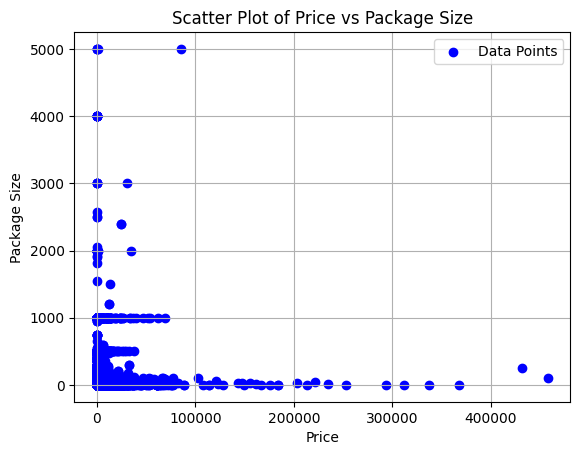

In [33]:
# Scatter Plot of Price vs Package Size. Outliers were not removed.
plt.scatter(df_stcharles['price'], df_stcharles['package_size'], label='Data Points', color='blue', marker='o')
plt.title('Scatter Plot of Price vs Package Size')
plt.xlabel('Price')
plt.ylabel('Package Size')
plt.legend()
plt.grid(True)
plt.show()

> **Stony Brook University Hospital Dataset**

In [34]:
# Basic descriptive statistics
df_stonybrook.describe()

,gross_charge,discounted_cash_price,de_identified_min_contracted_rate,de_identified_max_contracted_rate,derived_contracted_rate,1199_commercial_other,aetna_medicare_advantage_hmo,aetna_commercial_hmo_pos,aetna_commercial_ppo_open_access,aetna_commercial_other,...,optum_commercial_other,oxford_commercial_other,oxford_commercial_hmo_pos,tricare_commercial_other,united_healthcare_commercial_other,united_healthcare_medicare_advantage_hmo,united_healthcare_commercial_hmo_pos,united_healthcare_medicaid_hmo,united_healthcare_commercial_ppo_open_access,veteran_family_commercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


In [35]:
# Frequency counts of each of the unique gross charges
df_stonybrook['gross_charge'].value_counts()

8165.00     268
12090.00     70
13590.00     63
8965.00      47
513.00       13
           ... 
6453.95       1
3727.11       1
2284.63       1
18455.69      1
4580.00       1
Name: gross_charge, Length: 5871, dtype: int64

**____________________________________________________________________________________________________________**

# **2. SQLite Database Operations**

### Importing packages

In [5]:
from sqlalchemy import create_engine
import sqlite3

### Creating a new table

In [6]:
# Creating a temporary and local database using SQLite
conn = sqlite3.connect('health.db')
c = conn.cursor()

In [7]:
# Manually creating a table called 'health data' that contains information on patient's age, gender, weight, height, and temperature.
c.execute('''
            CREATE TABLE health_data (
              patient_id INTEGER PRIMARY KEY AUTOINCREMENT,
              name TEXT,
              age INTEGER,
              gender TEXT,
              weight_lbs REAL,
              height_cm REAL,
              temp_f REAL
            );
        ''')
conn.commit()

In [8]:
# Confirming that the table 'health data' has be successfully created with the health.db database.
### sqlite_master = a hidden / administrative table where only the database admin have access to.
# Selects the name of the tables where 'type' is a table.
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

[('health_data',), ('sqlite_sequence',)]

### Inserting data into the 'health data' table

In [9]:
# Using INSERT INTO to populate the 'health data' table with fake data.
sql_query = '''
INSERT INTO health_data
(
  'name',
  'age',
  'gender',
  'weight_lbs',
  'height_cm',
  'temp_f'
)
values
('Belle', 20, 'F', 134.4, 169.5, 98.6),
('Alice', 15, 'F', 120.2, 161.3, 97.7),
('John', 25, 'M', 200, 179, 98.5);
'''

In [10]:
# Executing the the query
c.execute(sql_query)
conn.commit()

> Checking that the data are inserted into the table

In [13]:
sql_query2 = '''
SELECT *
FROM health_data;
'''
c.execute(sql_query2)
print(c.fetchall())

[(1, 'Belle', 20, 'F', 134.4, 169.5, 98.6), (2, 'Alice', 15, 'F', 120.2, 161.3, 97.7), (3, 'John', 25, 'M', 200.0, 179.0, 98.5)]


> Using PANDAS to check the inserted data so it can be viewed as a dataframe

In [16]:
pd.read_sql_query("select * from health_data;", conn)

,patient_id,name,age,gender,weight_lbs,height_cm,temp_f
0,1,Belle,20,F,134.4,169.5,98.6
1,2,Alice,15,F,120.2,161.3,97.7
2,3,John,25,M,200.0,179.0,98.5


## **Automatic Table Creation**
Implementing the to_sql function from Pandas to take the data from the St. Charles Hopital dataset and putting it into the SQLite database. Dataset taken from part 1 of the assignment: *1. Data Exploration and Analysis*

In [36]:
df_stcharles.to_sql('hospital_pricing', conn, if_exists='replace')  # replace tables if table already exists

65050

In [41]:
# Running a query to test the table is successfully created
query = '''
SELECT *
FROM hospital_pricing
WHERE rev_code = '301'
LIMIT 10;
'''

response = pd.read_sql(query, conn) # Creates a new dataframe called 'response' and contains the query from above
response

,index,billing_charge_code,charge_description,rev_code,cpt_hcpc,price,ndc,package_size,package_unit,package_description,charge_quantity
0,0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,None,None,None,None,None
1,1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,None,None,None,None,None
2,2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,None,None,None,None,None
3,3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,None,None,None,None,None
4,15,3018391500,HC 5 NUCLEOTIDASE,301,83915,148.0,None,None,None,None,None
5,80,3018201300,HC ACETLYCHOLINESTERASE AMNIO FL,301,82013,381.0,None,None,None,None,None
6,81,3018201000,HC ACETONE QUANTITATIVE*C,301,82010,219.0,None,None,None,None,None
7,82,3018351901,HC ACETYLCHOLINE RECEP BLOCKING AB,301,83519,128.0,None,None,None,None,None
8,84,3018406000,HC ACID PHOSPHATASE,301,84060,223.0,None,None,None,None,None
9,88,3018202400,HC ACTH ADRENOCORT,301,82024,805.0,None,None,None,None,None


**____________________________________________________________________________________________________________**



# **(Optional) Dive Deeper with SQL**
Drafting at least one custom select SQL query to perform a rudimentary analysis on the data within the SQLite database.

### **Query 1**
This query selects the 'rev_code' column and the sum of the price column from the 'health_pricing' table. Results are grouped by rev_code and limited to show only 10 rows.

In [45]:
q1 = '''
SELECT rev_code, SUM (price)
FROM hospital_pricing
GROUP BY rev_code
LIMIT 10;
'''

response2 = pd.read_sql(q1, conn)
response2

,rev_code,SUM (price)
0,121,6013.0
1,122,7412.0
2,123,6013.0
3,125,3745.0
4,126,4008.0
5,128,4448.0
6,129,5496.0
7,138,3092.0
8,151,4295.0
9,153,4295.0


### **Query 2**
This query returns each distinct/unique rev_code present in the dataset.

In [46]:
q2 = '''
SELECT DISTINCT rev_code
FROM hospital_pricing
'''

response3 = pd.read_sql(q2, conn)
response3

,rev_code
0,301
1,360
2,512
3,400
4,311
...,...
138,419
139,682
140,151
141,153
